# Les systèmes de recommandation


Les systèmes de recommandation visent à maximiser la consommation en proposant à l'utilisateur ou consommateur les éléments le plus susceptibles de l'intéresser.
Ces systèmes se basent sur caractéristiques des utilisateurs qui se ressemblent pour sa "prédiction", on distingue trois méthodes de comparaison pour ce type d'algorithmes :

    => Basé sur l'objet lui même, ou "content-based approach"
    => Basé sur la personne
    => Basé sur la société qui l'entoure et ses influences, ou "Collaborative filtering, context aware"
    => Ou bien basé sur un melange de ces trois donnée, appellé recommandation hybride

## Épluchage des données

Nous utiliserons les données de l'université du Minnesota ("MovieLes dataset"), nous choisirons le dataset de 'seulement' 100 000 évaluations( le dataset total est doté de 20 000 000 d'evaluations, allez voir si vous voulez vous amuser https://grouplens.org/datasets/movielens/)

Premierement nous allons charger le fichier "ratings.csv"

In [ ]:
# Je ne reexplique pas, on commence a connaitre !
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Chargez le fichier souhaité
data = pd.read_csv('data/ratings.csv')

Étudions les datas qui nous sont fournies, nous avons 4 colonnes : 

        L'Id de l'utilisateur
        L'Id d'un film vu par l'utilisateur
        La note qu'il lui a attribué
        Le "timestamp", c'est a dire le moment ou il l'a vu

In [ ]:
data.head()

Ce serait tout de meme interessant d'avoir les noms des films...<br>
Et ils sont disponibles dans le fichier 'Movies.csv', quelle heureuse coincidence !<br>
Chargez ce fichier, et utilisez pd.merge() pour fusionner les deux pandas DataFrames sur la colonne qu'ils ont en commun<br>
Vous pouvez retirer la colonne "genres" si vous le voulez, on ne s'en servira pas ici

In [ ]:
movie_titles = pd.read_csv('data/Movies.csv')
data = pd.merge(data, movie_titles, on='movieId')
data.head()

In [90]:
# Jetons un coup d'oeil aux notations
data['rating'].describe()
# on normalise
data['rating'] = (data['rating'] - data['rating'].mean()) / (data['rating'].max() - data['rating'].min())

Nous allons maintenant creer un deuxieme dataframe pour stocker les moyennes de chaque film, pour ce faire utilisez pd.DataFrame()

In [91]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),0.110765
'Hellboy': The Seeds of Creation (2004),0.110765
'Round Midnight (1986),-0.000346
'Salem's Lot (2004),0.332987
'Til There Was You (1997),0.110765


Nous allons devoir ponderer les avis de chaque film, si un film a 5 etoiles de moyenne mais n'a ete vu que par 2 utilisateurs il faut en prendre compte dans notre algorithme.<br>
Créeons une colonne 'number_of_ratings' dans notre dataframe ratings :

In [92]:
ratings['number_of_ratings'] = data.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),0.110765,1
'Hellboy': The Seeds of Creation (2004),0.110765,1
'Round Midnight (1986),-0.000346,2
'Salem's Lot (2004),0.332987,1
'Til There Was You (1997),0.110765,2


Etudions un peu nos données :

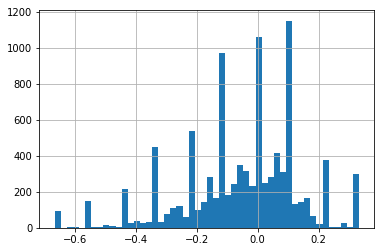

In [93]:
# Visualisons la distribution des avis
ratings['rating'].hist(bins=50)

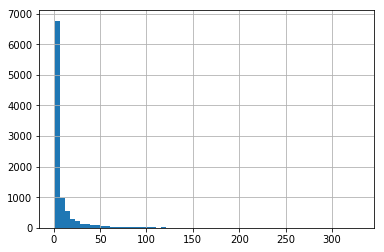

In [94]:
# Puis la ponderation qui lui est associée
ratings['number_of_ratings'].hist(bins=60)

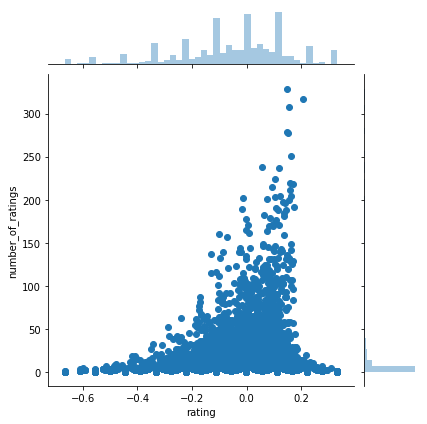

In [95]:
# Et enfin un graph combinant les deux
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

Comme vous pouvez le voir, peu de films ont réellement suffisament d'évaluations pour être considéré comme statistiquement valable.<br>
Nous devrons donc retirer les donnée trop peu fiables de notre data set.

## Mise en place d'un systeme de recommandation basique

Commençons par creer une matrice, avec comme colonnes les noms des films, l'UserId en index et les évaluations en valeurs.<br>
Vous allez avoir beacoup de NaN, c'est normal (Les utilisateurs individuellement, n'ont vus que peu des films)<br>
<br>
Utilisez la méthode DataFrame.pivot_table() !


In [96]:
movies = data.pivot_table(index='userId', columns='title', values='rating')
movies.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110765,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Commençons par choisir un films. Nous supposerons que l'utilisateur a vu ce film.<br>
Prenez celui que vous voulez !

In [97]:
# Un apercu des films avec le plus de vues, vous devriez en reconnaitre queques uns !
print(ratings.sort_values('number_of_ratings', ascending=False).head())

# Choisissez-en un
#movie1_name = 'The Diary of Anne Frank (1959)'
movie1_name = 'Shrek (2001)'

                                    rating  number_of_ratings
title                                                        
Forrest Gump (1994)               0.147239                329
Shawshank Redemption, The (1994)  0.206103                317
Pulp Fiction (1994)               0.154558                307
Silence of the Lambs, The (1991)  0.146607                279
Matrix, The (1999)                0.153531                278


In [98]:
movie1 = movies[movie1_name]

Nous allons maintenant devoir trouver le film qui est le plus aimé par les utilisateurs qui ont aimés ce films...<br>
Et ca tombe bien, on a un super outil compris dans pandas, DataFrame.Corrwith() !

In [99]:
movie1_similar = movies.corrwith(movie1)
movie1_similar = movie1_similar.sort_values(ascending=False)
movie1_similar.sort_values(ascending=False).head()

title
Independence Day: Resurgence (2016)                         1.0
Warriors of Heaven and Earth (Tian di ying xiong) (2003)    1.0
Death Note (2017)                                           1.0
Anywhere But Here (1999)                                    1.0
Room, The (2003)                                            1.0
dtype: float64

Nous allons maintenant formater notre liste de correlation afin de retirer les valeurs nulles

In [100]:
corr_movie1 = pd.DataFrame(movie1_similar, columns=['Correlation'])
corr_movie1 = corr_movie1.dropna()

On commence a avoir des resultats !<br>
<br>
Mais comme on l'a vu tout a l'heure, notre database est fortement biaisée par le faible nombre d'avis sur beaucoup de films.<br>
On va donc commencer par joindre la colonne 'number_of_ratings' a nos deux listes de correlations, puis nous ne tiendrons compte que des evaluations au dessus d'un certain nombre d'evaluations.<br>

In [101]:
# Ajouter a chacune des listes la colonne 'number_of_ratings' du tableau ratings
corr_movie1 = corr_movie1.join(ratings['number_of_ratings'])

In [102]:
# Ne selectionner que les films avec plus de 50 avis, et les trier avec sort_values
corr_movie1 = corr_movie1[corr_movie1['number_of_ratings'] > 50].sort_values(by='Correlation', ascending=False).head(10)

In [103]:
i = corr_movie1['Correlation'][1:]
i

title
Shrek 2 (2004)            0.821400
Desperado (1995)          0.658700
Finding Nemo (2003)       0.644980
Dragonheart (1996)        0.636731
Bug's Life, A (1998)      0.582808
Monsters, Inc. (2001)     0.581781
Airplane! (1980)          0.548393
Pocahontas (1995)         0.547651
Johnny Mnemonic (1995)    0.541857
Name: Correlation, dtype: float64

Reunissons tout ceci dans une fonction :

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('data/ratings.csv')
movie_titles = pd.read_csv('data/Movies.csv')

data = pd.merge(data, movie_titles, on='movieId')
data['rating'] = (data['rating'] - data['rating'].mean()) / (data['rating'].max() - data['rating'].min())
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['number_of_ratings'] = data.groupby('title')['rating'].count()
movies = data.pivot_table(index='userId', columns='title', values='rating')

def test_prediction(tests):
    for user in tests:
        pref = dict(movies.iloc[user].dropna())
        films = []
        for movie in pref:
            films.append(movie)
        test = films[0]
        films.remove(films[0])
        guess = recommender_system(films, 50)
        print(test, guess)

def best_recommendation(recc):
    max_value = 0.0
    max_title = ''
    for i in recc:
        if (float(recc[i]) >= float(max_value)):
            max_value = recc[i]
            max_title = i
    genre = np.unique(data['genres'][data['title'] == max_title])
    print(max_title, max_value, genre)
    return max_title

def recommender_system(title_list, confiance):
    
    recommendation = dict(np.transpose([list(movie_titles['title']), np.zeros(len(movie_titles['title']))]))
    
    step = 0
    tot_films = len(title_list)
    
    for title in title_list:
        
        movie = movies[title]
        movie_similar = movies.corrwith(movie)
        corr_movie = pd.DataFrame(movie_similar, columns=['Correlation']).dropna()
        corr_movie = corr_movie.join(ratings['number_of_ratings'])
        corr_movie = corr_movie[corr_movie['number_of_ratings'] > confiance].sort_values(by='Correlation', ascending=False)
        corr_movie = dict(corr_movie[1:]['Correlation'])
        
        step += 1
        print("Analised : %s (%d out of %d)" % (title, step, tot_films))
        
        for title in corr_movie:
            recommendation[title] = (float(corr_movie[title]) + float(recommendation[title])) / 2
    
    print("Done !")
    return best_recommendation(recommendation)


In [ ]:
test_prediction([2, 8, 500])

Analised : Alien Contamination (1980) (1 out of 38)
Analised : Android (1982) (2 out of 38)
Analised : Bambi (1942) (3 out of 38)
Analised : Clonus Horror, The (1979) (4 out of 38)
Analised : Conan the Barbarian (1982) (5 out of 38)
Analised : Courage Under Fire (1996) (6 out of 38)
Analised : Dangerous Minds (1995) (7 out of 38)
Analised : Death Race 2000 (1975) (8 out of 38)
Analised : Deer Hunter, The (1978) (9 out of 38)
Analised : Doors, The (1991) (10 out of 38)
Analised : Escape from L.A. (1996) (11 out of 38)
Analised : Fast Times at Ridgemont High (1982) (12 out of 38)
Analised : Field of Dreams (1989) (13 out of 38)
Analised : Galaxy of Terror (Quest) (1981) (14 out of 38)
Analised : Green Card (1990) (15 out of 38)
Analised : Hangar 18 (1980) (16 out of 38)
Analised : Highlander (1986) (17 out of 38)
Analised : Lady and the Tramp (1955) (18 out of 38)
Analised : Looker (1981) (19 out of 38)
Analised : Master of the Flying Guillotine (Du bi quan wang da po xue di zi) (1975) (

Sources : <br>
https://fr.wikipedia.org/wiki/Syst%C3%A8me_de_recommandation<br>
https://www.podcastscience.fm/dossiers/2012/04/25/les-algorithmes-de-recommandation/<br>
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/<br>
https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d<br>
            